#### Importando as bibliotecas necessárias

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Lendo os dados

In [144]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### Redefinindo unidades de medida 

Idade(dias) -> idade(anos)

Altura(cm) -> altura(metros)

In [145]:
df['age'] = df['age'] // 365

In [146]:
df['height'] = df['height'] / 100

#### Definindo uma coluna 'sobrepeso' através do calculo do IMC

In [147]:
df['overweight'] = np.where(df['weight'] / np.square(df['height']) > 25, 1, 0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,0
1,1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,1
2,2,51,1,1.65,64.0,130,70,3,1,0,0,0,1,0
3,3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,1
4,4,47,1,1.56,56.0,100,60,1,1,0,0,0,0,0


#### Normalizando as colunas 'colesterol' e 'glicose'

In [148]:
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50,2,1.68,62.0,110,80,0,1,0,0,1,0,0
1,1,55,1,1.56,85.0,140,90,1,1,0,0,1,1,1
2,2,51,1,1.65,64.0,130,70,1,1,0,0,0,1,0
3,3,48,2,1.69,82.0,150,100,0,1,0,0,1,1,1
4,4,47,1,1.56,56.0,100,60,0,1,0,0,0,0,0


In [149]:
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,55,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,51,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,48,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,47,1,1.56,56.0,100,60,0,0,0,0,0,0,0


#### Definindo o DataFrame para o Categorical Plot

In [150]:
df_cat = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
df_cat = pd.melt(df, id_vars = ['cardio'], value_vars = df_cat)

In [151]:
df_cat.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


In [152]:
df_cat = pd.DataFrame(df_cat.groupby(['cardio','variable','value'])['value'].count()).rename(columns={'value':'total'}).reset_index()
df_cat.head()

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


#### Catplot

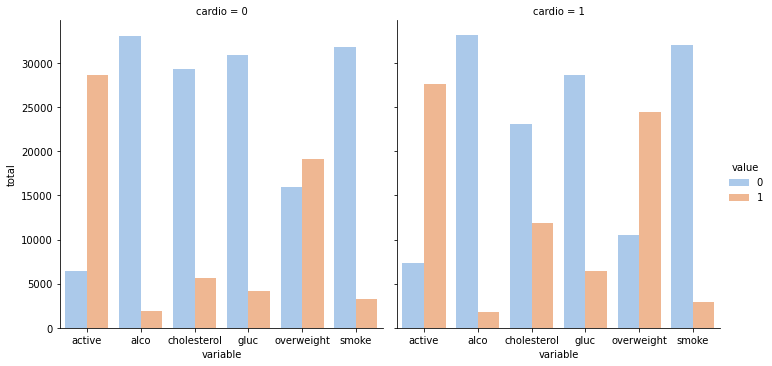

In [156]:
sns.catplot(data = df_cat, x = 'variable', y = 'total', hue = 'value', col = 'cardio', kind = 'bar', palette='pastel')